In [1]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/final-dengue-dataset/DengueFinalDatasets.csv'
dengue_data = pd.read_csv(file_path)

dengue_data.head()

,Age,Sex,Month Affected,Duration of fever (days),Current body temperature (°C),White Blood Cell (WBC) Count,Back pain in eyes,Joint pain,Muscle pain,Vomiting,...,Rash,Pleural effusion,Ascites,Bleeding,Slow heart rate,Igg,Igm,NS1,Travelling history,Headache
0,13,Male,May,11,38.2,11257,Low,Medium,High,Low,...,Medium,Medium,Medium,Medium,Medium,Negative,Positive,Positive,Yes,High
1,4,Female,January,8,38.7,9824,Low,Low,High,High,...,Medium,Medium,High,Low,Medium,Negative,Negative,Positive,Yes,High
2,68,Female,October,14,38.9,4731,High,Low,Medium,High,...,High,Low,Medium,Low,Low,Negative,Negative,Negative,Yes,Medium
3,73,Male,July,11,37.8,5055,Medium,High,Medium,High,...,Low,High,High,Medium,High,Positive,Positive,Positive,No,Medium
4,31,Female,April,4,38.4,5755,High,Medium,Medium,Medium,...,Low,Medium,High,Low,High,Negative,Negative,Negative,Yes,Low


In [2]:

categorical_columns = dengue_data.select_dtypes(include=['object']).columns
dengue_data[categorical_columns] = dengue_data[categorical_columns].astype('category')
numerical_columns = dengue_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    Q1 = dengue_data[col].quantile(0.25)
    Q3 = dengue_data[col].quantile(0.75)
    IQR = Q3 - Q1
    filter = (dengue_data[col] >= Q1 - 1.5 * IQR) & (dengue_data[col] <= Q3 + 1.5 * IQR)
    dengue_data = dengue_data.loc[filter]

dengue_data = dengue_data.drop_duplicates()

updated_dataset_info = dengue_data.info()
updated_dataset_info


<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            300 non-null    int64   
 1   Sex                            300 non-null    category
 2   Month Affected                 300 non-null    category
 3   Duration of fever (days)       300 non-null    int64   
 4   Current body temperature (°C)  300 non-null    float64 
 5   White Blood Cell (WBC) Count   300 non-null    int64   
 6   Back pain in eyes              300 non-null    category
 7   Joint pain                     300 non-null    category
 8   Muscle pain                    300 non-null    category
 9   Vomiting                       300 non-null    category
 10  Hemoglobin Range               300 non-null    category
 11  Hematocrit Range               300 non-null    category
 12  Platelets Count                300 non-nu

In [3]:
ns1_value_counts = dengue_data['NS1'].value_counts()
#ns1_categories = dengue_data['NS1'].cat.categories
ns1_value_counts

NS1
Negative    167
Positive    133
Name: count, dtype: int64

# 1.  ExtraTreeClassifier

              precision    recall  f1-score   support

    Negative       0.50      0.58      0.54        45
    Positive       0.50      0.42      0.46        45

    accuracy                           0.50        90
   macro avg       0.50      0.50      0.50        90
weighted avg       0.50      0.50      0.50        90



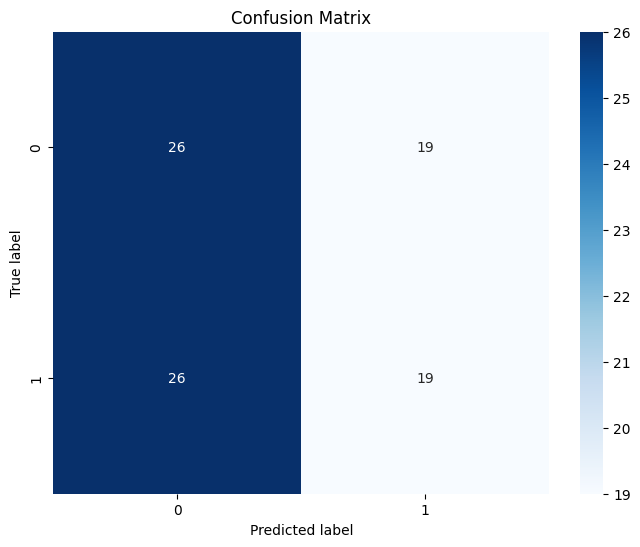

In [4]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X = dengue_data.drop('NS1', axis=1)
y = dengue_data['NS1']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


clf = ExtraTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Displaying the classification report
print(class_report)

# Show the plot
plt.show()

# 2. DecisionTreeClassifier

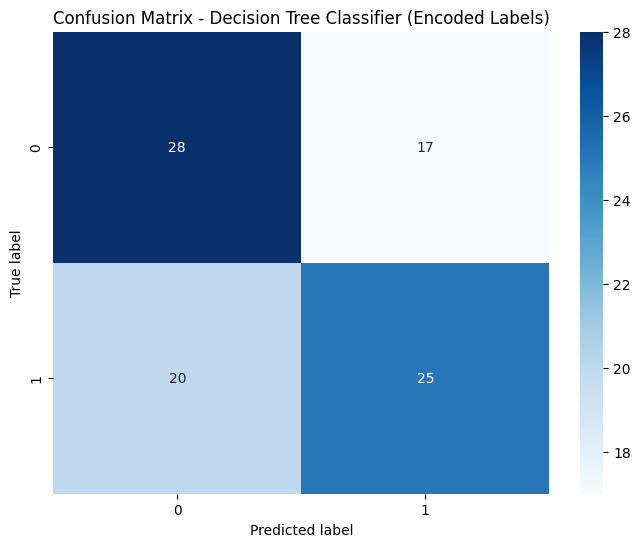

(0.5888888888888889,
 0.4111111111111111,
 0.5952380952380952,
 0.5555555555555556,
 0.574712643678161,
 0.6222222222222222)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc = DecisionTreeClassifier(random_state=0)



label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the encoded data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

# Train the DecisionTreeClassifier on the encoded labels
dtc.fit(X_train, y_train_encoded)

# Predictions on the test set
y_pred_dtc_encoded = dtc.predict(X_test)

# Recalculating the metrics with the encoded labels
conf_matrix_dtc_encoded = confusion_matrix(y_test_encoded, y_pred_dtc_encoded)
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_dtc_encoded)
misclassification_rate_encoded = 1 - accuracy_encoded
precision_encoded = precision_score(y_test_encoded, y_pred_dtc_encoded)
recall_encoded = recall_score(y_test_encoded, y_pred_dtc_encoded)
f_measure_encoded = f1_score(y_test_encoded, y_pred_dtc_encoded)

# Specificity calculation (using encoded labels)
TN_encoded, FP_encoded, FN_encoded, TP_encoded = conf_matrix_dtc_encoded.ravel()
specificity_encoded = TN_encoded / (TN_encoded + FP_encoded)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dtc_encoded, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Decision Tree Classifier (Encoded Labels)')

# Show the plot
plt.show()

# Returning the recalculated metrics
accuracy_encoded, misclassification_rate_encoded, precision_encoded, recall_encoded, f_measure_encoded, specificity_encoded

# 3. MLPClassifier

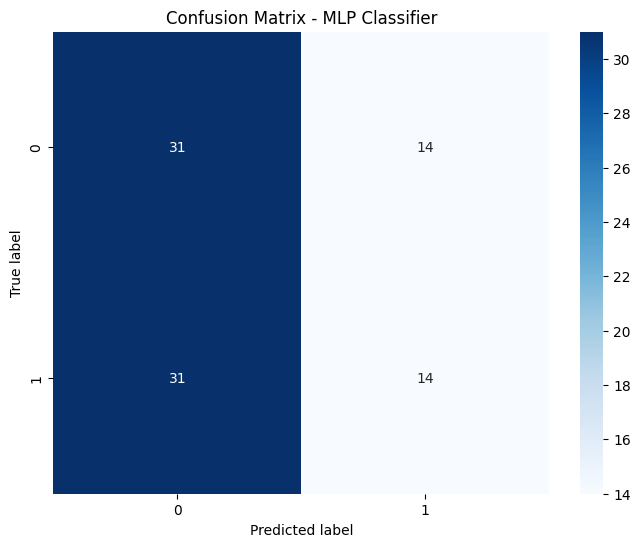

(0.5, 0.5, 0.5, 0.3111111111111111, 0.3835616438356164, 0.6888888888888889)

In [6]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the MLPClassifier
# We'll use a simple architecture with one hidden layer, as an example
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=0)
mlp.fit(X_train, y_train_encoded)

# Predictions
y_pred_mlp = mlp.predict(X_test)

# Confusion Matrix for MLPClassifier
conf_matrix_mlp = confusion_matrix(y_test_encoded, y_pred_mlp)

# Calculating various metrics
accuracy_mlp = accuracy_score(y_test_encoded, y_pred_mlp)
misclassification_rate_mlp = 1 - accuracy_mlp
precision_mlp = precision_score(y_test_encoded, y_pred_mlp)
recall_mlp = recall_score(y_test_encoded, y_pred_mlp)
f_measure_mlp = f1_score(y_test_encoded, y_pred_mlp)

# Specificity calculation for MLPClassifier
TN_mlp, FP_mlp, FN_mlp, TP_mlp = conf_matrix_mlp.ravel()
specificity_mlp = TN_mlp / (TN_mlp + FP_mlp)

# Visualize the Confusion Matrix for MLPClassifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - MLP Classifier')

# Show the plot
plt.show()

# Returning the calculated metrics
accuracy_mlp, misclassification_rate_mlp, precision_mlp, recall_mlp, f_measure_mlp, specificity_mlp



# 4. KNeighborsClassifier

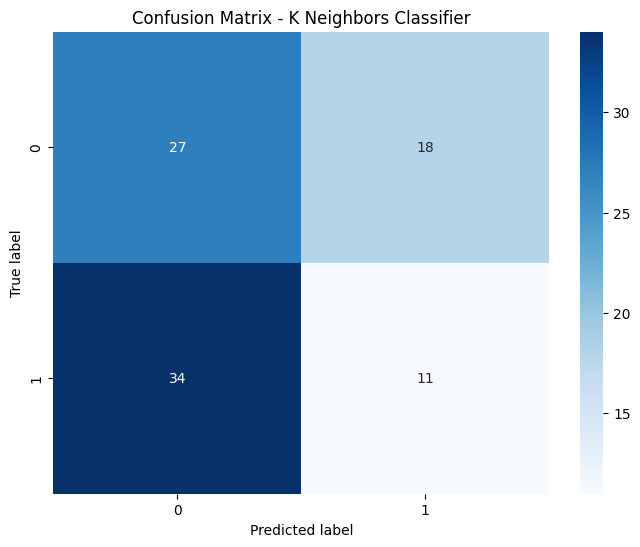

(0.4222222222222222,
 0.5777777777777777,
 0.3793103448275862,
 0.24444444444444444,
 0.29729729729729726,
 0.6)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train_encoded)

# Predictions
y_pred_knc = knc.predict(X_test)

# Confusion Matrix for KNeighborsClassifier
conf_matrix_knc = confusion_matrix(y_test_encoded, y_pred_knc)

# Calculating various metrics
accuracy_knc = accuracy_score(y_test_encoded, y_pred_knc)
misclassification_rate_knc = 1 - accuracy_knc
precision_knc = precision_score(y_test_encoded, y_pred_knc)
recall_knc = recall_score(y_test_encoded, y_pred_knc)
f_measure_knc = f1_score(y_test_encoded, y_pred_knc)

# Specificity calculation for KNeighborsClassifier
TN_knc, FP_knc, FN_knc, TP_knc = conf_matrix_knc.ravel()
specificity_knc = TN_knc / (TN_knc + FP_knc)

# Visualize the Confusion Matrix for KNeighborsClassifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knc, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - K Neighbors Classifier')

# Show the plot
plt.show()

# Returning the calculated metrics
accuracy_knc, misclassification_rate_knc, precision_knc, recall_knc, f_measure_knc, specificity_knc



# 5. ClassifierChain

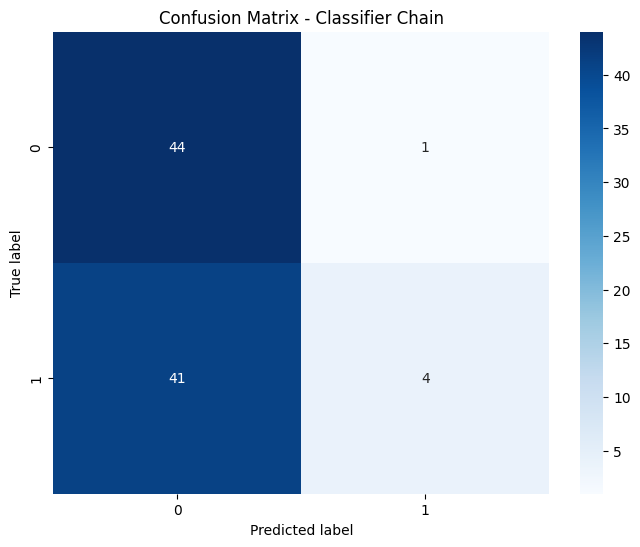

(0.5333333333333333,
 0.4666666666666667,
 0.8,
 0.08888888888888889,
 0.15999999999999998,
 0.9777777777777777)

In [8]:
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression

# Initialize a base classifier for the ClassifierChain
base_classifier = LogisticRegression()

# Initialize the ClassifierChain with the base classifier
chain = ClassifierChain(base_classifier, order='random', random_state=0)
chain.fit(X_train, y_train_encoded.reshape(-1, 1))

# Predictions
y_pred_chain = chain.predict(X_test).flatten()

# Confusion Matrix for ClassifierChain
conf_matrix_chain = confusion_matrix(y_test_encoded, y_pred_chain)

# Calculating various metrics
accuracy_chain = accuracy_score(y_test_encoded, y_pred_chain)
misclassification_rate_chain = 1 - accuracy_chain
precision_chain = precision_score(y_test_encoded, y_pred_chain)
recall_chain = recall_score(y_test_encoded, y_pred_chain)
f_measure_chain = f1_score(y_test_encoded, y_pred_chain)

# Specificity calculation for ClassifierChain
TN_chain, FP_chain, FN_chain, TP_chain = conf_matrix_chain.ravel()
specificity_chain = TN_chain / (TN_chain + FP_chain)

# Visualize the Confusion Matrix for ClassifierChain
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_chain, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Classifier Chain')

# Show the plot
plt.show()

# Returning the calculated metrics
accuracy_chain, misclassification_rate_chain, precision_chain, recall_chain, f_measure_chain, specificity_chain



# 6. SGDClassifier

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


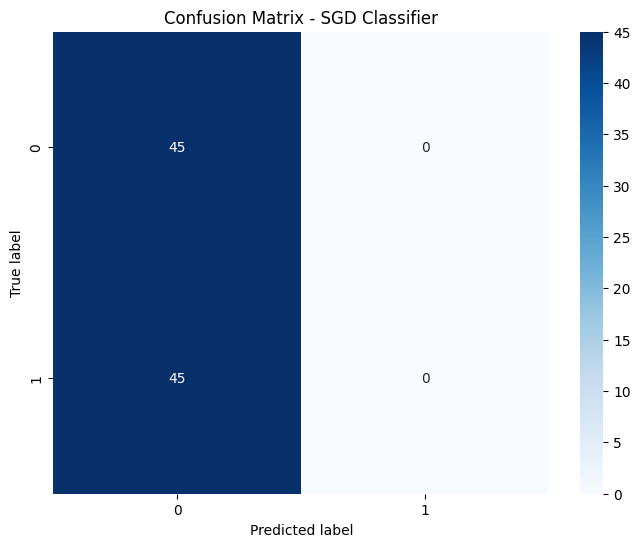

(0.5, 0.5, 0.0, 0.0, 0.0, 1.0)

In [9]:
from sklearn.linear_model import SGDClassifier

# Initialize and train the SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=0)
sgd.fit(X_train, y_train_encoded)

# Predictions
y_pred_sgd = sgd.predict(X_test)

# Confusion Matrix for SGDClassifier
conf_matrix_sgd = confusion_matrix(y_test_encoded, y_pred_sgd)

# Calculating various metrics
accuracy_sgd = accuracy_score(y_test_encoded, y_pred_sgd)
misclassification_rate_sgd = 1 - accuracy_sgd
precision_sgd = precision_score(y_test_encoded, y_pred_sgd)
recall_sgd = recall_score(y_test_encoded, y_pred_sgd)
f_measure_sgd = f1_score(y_test_encoded, y_pred_sgd)

# Specificity calculation for SGDClassifier
TN_sgd, FP_sgd, FN_sgd, TP_sgd = conf_matrix_sgd.ravel()
specificity_sgd = TN_sgd / (TN_sgd + FP_sgd)

# Visualize the Confusion Matrix for SGDClassifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sgd, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - SGD Classifier')

# Show the plot
plt.show()

# Returning the calculated metrics
accuracy_sgd, misclassification_rate_sgd, precision_sgd, recall_sgd, f_measure_sgd, specificity_sgd



# 7. RidgeClassifierCV

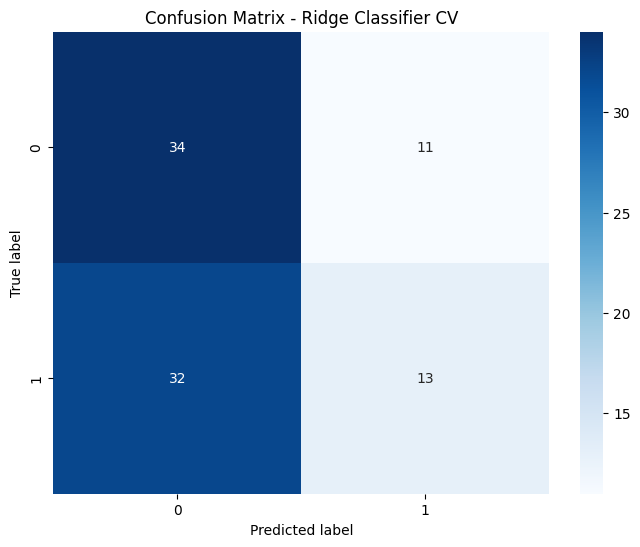

(0.5222222222222223,
 0.47777777777777775,
 0.5416666666666666,
 0.28888888888888886,
 0.3768115942028985,
 0.7555555555555555)

In [10]:
from sklearn.linear_model import RidgeClassifierCV

# Initialize and train the RidgeClassifierCV
ridge_cv = RidgeClassifierCV()
ridge_cv.fit(X_train, y_train_encoded)

# Predictions
y_pred_ridge_cv = ridge_cv.predict(X_test)

# Confusion Matrix for RidgeClassifierCV
conf_matrix_ridge_cv = confusion_matrix(y_test_encoded, y_pred_ridge_cv)

# Calculating various metrics
accuracy_ridge_cv = accuracy_score(y_test_encoded, y_pred_ridge_cv)
misclassification_rate_ridge_cv = 1 - accuracy_ridge_cv
precision_ridge_cv = precision_score(y_test_encoded, y_pred_ridge_cv)
recall_ridge_cv = recall_score(y_test_encoded, y_pred_ridge_cv)
f_measure_ridge_cv = f1_score(y_test_encoded, y_pred_ridge_cv)

# Specificity calculation for RidgeClassifierCV
TN_ridge_cv, FP_ridge_cv, FN_ridge_cv, TP_ridge_cv = conf_matrix_ridge_cv.ravel()
specificity_ridge_cv = TN_ridge_cv / (TN_ridge_cv + FP_ridge_cv)

# Visualize the Confusion Matrix for RidgeClassifierCV
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ridge_cv, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Ridge Classifier CV')

# Show the plot
plt.show()

# Returning the calculated metrics
accuracy_ridge_cv, misclassification_rate_ridge_cv, precision_ridge_cv, recall_ridge_cv, f_measure_ridge_cv, specificity_ridge_cv



# 8. 